<a href="https://colab.research.google.com/github/jimwellh/NYCU-Introduction-to-Data-science/blob/main/0811033_%E9%BB%83%E5%8B%81%E7%91%8B_hw07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Data Science** Homework 7
0811033_黃勁瑋_hw07\
2023/11/21


*  Use R, Python, and suitable computer packages to perform different types of Classification Models
*   Explain the results you obtain.
*   Compare the results you obtain by different Classification approaches.
*   Discuss possible problems you plan to investigate for future studies

In this homework I decide to analyze the Drug Classification dataset from Kaggle (kaggle datasets download -d prathamtripathi/drug-classification). The dataset include 6 variables.


*   Age: Patient Age
*   Sex: Gender of patient (male or female)
*   BP: Levels of blood pressure (high, normal, or low)
*   Cholesterol: Levels of cholesterol (high or normal)
*   Na_to_K: Sodium to potassium ratio in blood
*   Drug: Type of drug

The goal of this homework is to classify what type of drug shoud the doctor use for a patient based on the given variables.


**Load the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
df= pd.read_csv('/content/drive/MyDrive/Introduction to Data science/Data sets/drug200.csv')
#check is the data is read successfully
print(df.head(10))
print(df.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY
5   22   F  NORMAL        HIGH    8.607  drugX
6   49   F  NORMAL        HIGH   16.275  DrugY
7   41   M     LOW        HIGH   11.037  drugC
8   60   M  NORMAL        HIGH   15.171  DrugY
9   43   M     LOW      NORMAL   19.368  DrugY
(200, 6)


**EDA and Data Preprocessing**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


There are 200 data and have no missing value.

In [ ]:
for col in df.columns:
  if df[col].dtype == object:
    print(df[col].value_counts(),"\n\n")

M    104
F     96
Name: Sex, dtype: int64 


HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64 


HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64 


DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64 




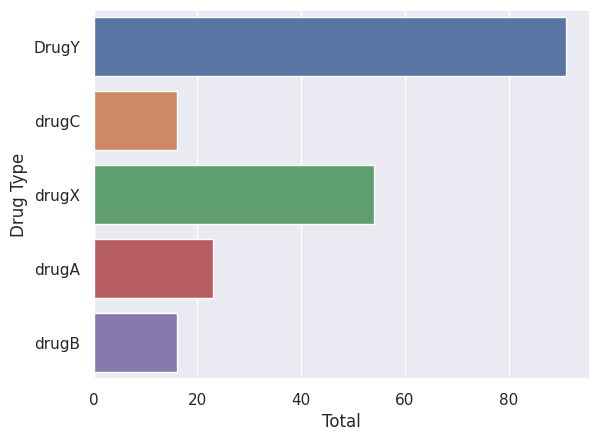

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df)
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

Variables Sex, BP, Cholesterol are balance but variable Drug is not. Since there is only 200 data points, I will try over-sampling the balance the data. Furthermore, because variables Sex, BP, Cholesterol are either binary or sequential, the transformtion of categorical variables into numerical variables can be done directly instead of using methods such as one-hot encoding.   

In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<ipython-input-246-3cd339c99e47>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age']);


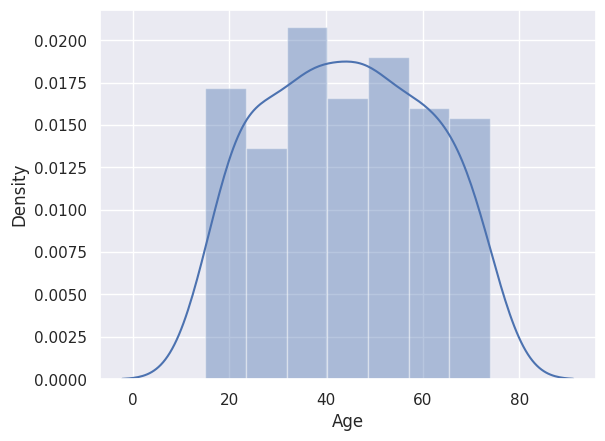

In [ ]:
sns.distplot(df['Age']);

<ipython-input-247-5a583057d479>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Na_to_K']);


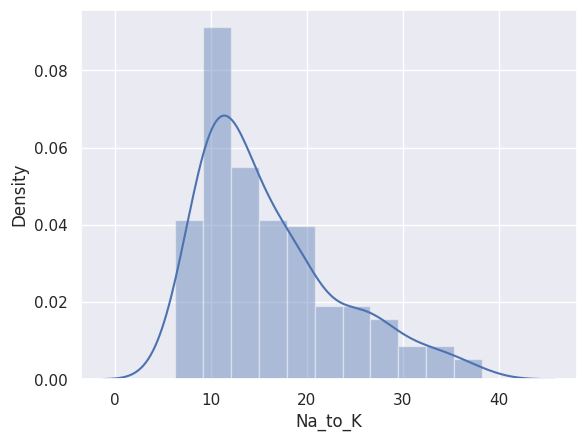

In [ ]:
sns.distplot(df['Na_to_K']);

The Na_to_K data is right-skewed and all the data is greater then 0. To get a better prediction, methods such as Box-Cox could be applied to tune the data into normal distribusion.

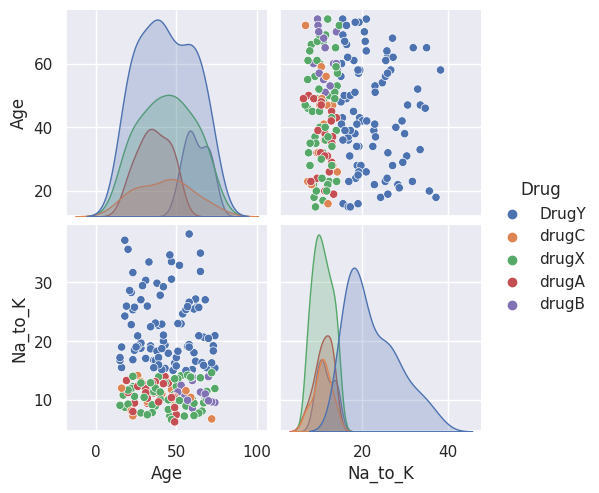

In [ ]:
sns.pairplot(df,hue='Drug')
plt.show()

In [ ]:
# Data Preprocessing

#transformtion of categorical variables
df['Sex'].replace(['M','F'],[1,0],inplace=True)
df['BP'].replace(['HIGH','NORMAL','LOW'],[1,0.5,0],inplace=True)
df['Cholesterol'].replace(['HIGH','NORMAL'],[1,0],inplace=True)

print(df.head(10),"\n")
print(df.info(),"\n")
df.describe()


   Age  Sex   BP  Cholesterol  Na_to_K   Drug
0   23    0  1.0            1   25.355  DrugY
1   47    1  0.0            1   13.093  drugC
2   47    1  0.0            1   10.114  drugC
3   28    0  0.5            1    7.798  drugX
4   61    0  0.0            1   18.043  DrugY
5   22    0  0.5            1    8.607  drugX
6   49    0  0.5            1   16.275  DrugY
7   41    1  0.0            1   11.037  drugC
8   60    1  0.5            1   15.171  DrugY
9   43    1  0.0            0   19.368  DrugY 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    float64
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage

,Age,Sex,BP,Cholesterol,Na_to_K
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.532500,0.515000,16.084485
std,16.544315,0.500854,0.419612,0.501029,7.223956
min,15.000000,0.000000,0.000000,0.000000,6.269000
25%,31.000000,0.000000,0.000000,0.000000,10.445500
50%,45.000000,1.000000,0.500000,1.000000,13.936500
75%,58.000000,1.000000,1.000000,1.000000,19.380000
max,74.000000,1.000000,1.000000,1.000000,38.247000


<ipython-input-250-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

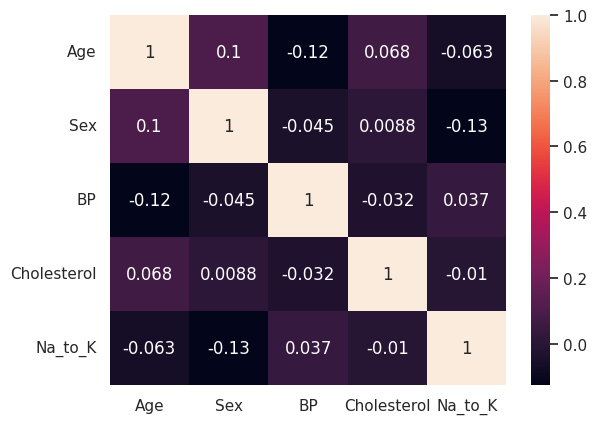

In [ ]:
sns.heatmap(df.corr(),annot=True)

**Dataset Preparation**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy import stats
from imblearn.over_sampling import SMOTE

As sain in the EDA section ,I will use Box-Cox to tune the Na_to_K data in order to tune the right-skewed data back.

skewness:0.041215
kurtosis:-0.786843
best lambda:-0.352786


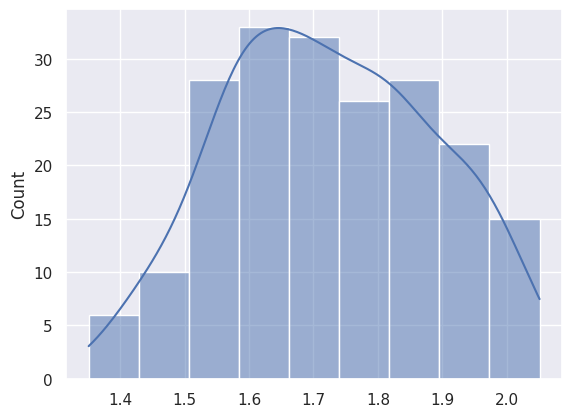

In [ ]:
#Box-Cox
transData, lambdaValue =stats.boxcox(df['Na_to_K'])
#輸出轉換結果
print('skewness:%f'%stats.skew(transData, bias = False))
print('kurtosis:%f'%stats.kurtosis(transData, bias = False, fisher=True))
print('best lambda:%f'%lambdaValue)
sns.histplot(transData, kde = True, bins = 'auto')
plt.show()

The dataset will be split into 70% training and 30% testing with no validation data because there is only 200 data and the goal of this homework is to compare and evaluate different model.

In [ ]:
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#Check if the both train and test data contains all kinds of drugs
print(y_train.value_counts(),"\n")
print(y_test.value_counts())


DrugY    61
drugX    36
drugA    18
drugB    13
drugC    12
Name: Drug, dtype: int64 

DrugY    30
drugX    18
drugA     5
drugC     4
drugB     3
Name: Drug, dtype: int64


As sain in the EDA section ,I will use SMOTE to oversample the data in order to avoid dat imbalance issue.  

In [ ]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

**Modeling**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
def model_prediction(model,roc=True):
  model.fit(X_train,y_train)
  X_train_pred = model.predict(X_train)
  X_test_pred = model.predict(X_test)

  print(classification_report(y_test, X_test_pred))
  #cm=confusion_matrix(y_test, X_test_pred,labels=model.classes_)
  #disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
  #disp.plot()
  #plt.show()
  ConfusionMatrixDisplay.from_predictions(y_test, X_test_pred)

  print('The accuracy is: {:.2f}%'.format(accuracy_score(X_test_pred,y_test)*100))

  #Plot ROC curve
  if roc is True:
    y_score = model.fit(X_train, y_train).predict_proba(X_test)
    label_binarizer = LabelBinarizer().fit(y_train)
    y_onehot_test = label_binarizer.transform(y_test)


    # store the fpr, tpr, and roc_auc for all averaging strategies
    fpr, tpr, roc_auc = dict(), dict(), dict()
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    fig, ax = plt.subplots(figsize=(6, 6))

    plt.plot(
        fpr["micro"],
        tpr["micro"],
        label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    target_names = df['Drug'].unique()
    for class_id, color in zip(range(5), colors):
        RocCurveDisplay.from_predictions(
            y_onehot_test[:, class_id],
            y_score[:, class_id],
            name=f"ROC curve for {target_names[class_id]}",
            color=color,
            ax=ax,
            #plot_chance_level=(class_id == 2),
        )

    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
    plt.legend()
    plt.show()


*Logistic Regression*

              precision    recall  f1-score   support

       DrugY       1.00      0.93      0.97        30
       drugA       0.56      1.00      0.71         5
       drugB       0.40      0.67      0.50         3
       drugC       0.44      1.00      0.62         4
       drugX       1.00      0.50      0.67        18

    accuracy                           0.80        60
   macro avg       0.68      0.82      0.69        60
weighted avg       0.90      0.80      0.81        60

The accuracy is: 80.00%


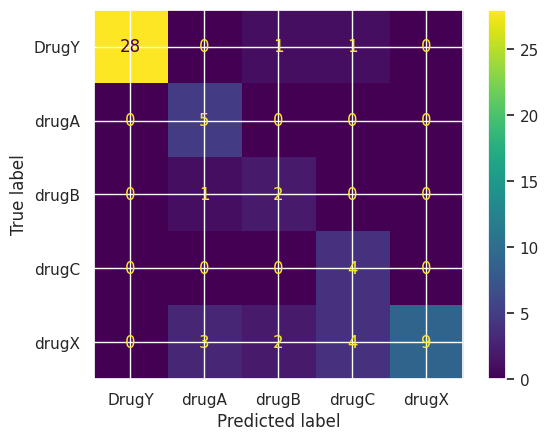

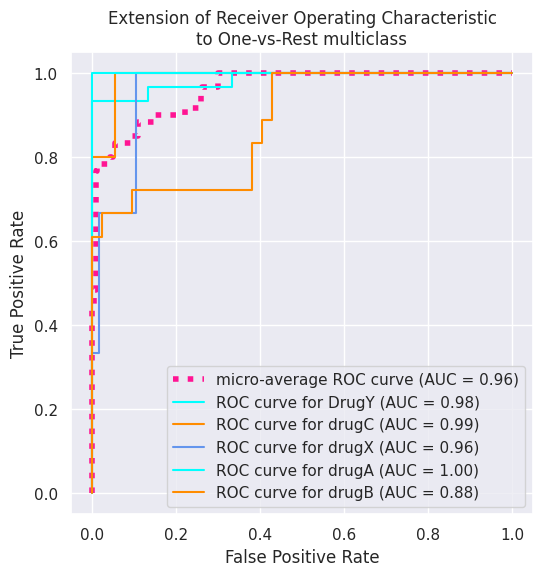

In [ ]:
model_prediction(LogisticRegression(solver='liblinear', max_iter=5000))

The accuracy of logistic regression model is 80.00%. From the ROC curve and the AUC score we can see that the prediction of drugB amoung all drugs are less good, however, the overall performance of the model is OK.  

*K-Neighbors*

              precision    recall  f1-score   support

       DrugY       1.00      0.87      0.93        30
       drugA       0.26      1.00      0.42         5
       drugB       0.29      0.67      0.40         3
       drugC       0.00      0.00      0.00         4
       drugX       0.83      0.28      0.42        18

    accuracy                           0.63        60
   macro avg       0.48      0.56      0.43        60
weighted avg       0.79      0.63      0.64        60

The accuracy is: 63.33%


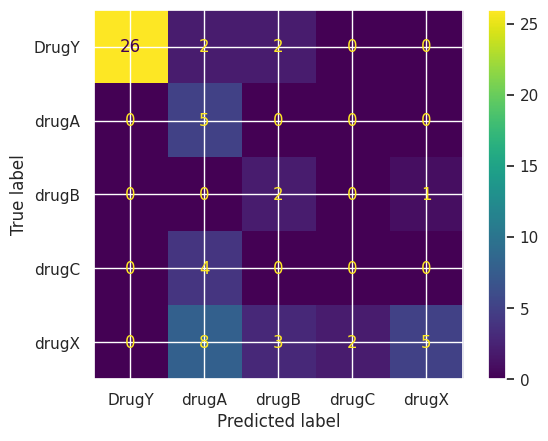

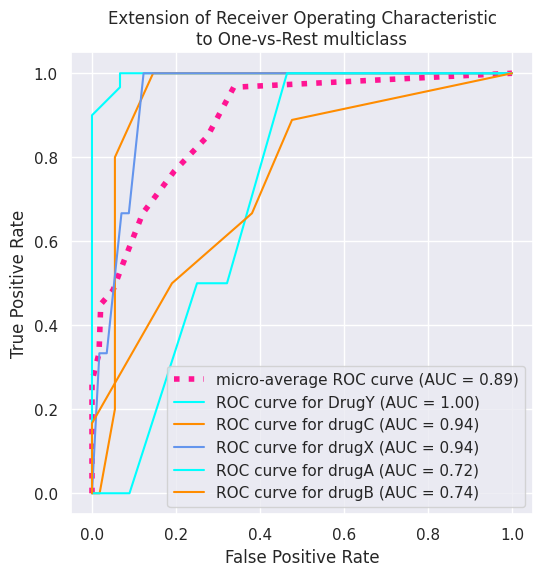

In [ ]:
model_prediction(KNeighborsClassifier(n_neighbors=10))

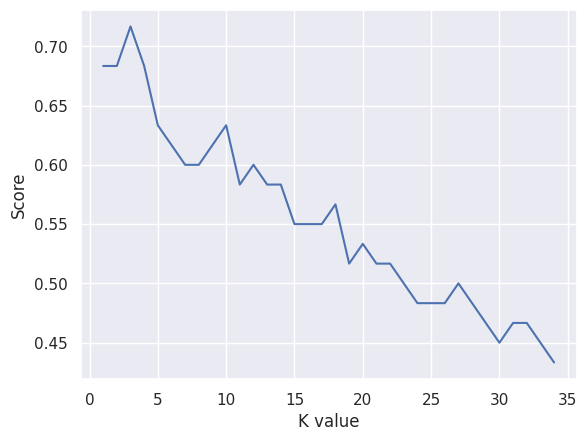

KNN Acc Max 71.67%


In [ ]:
scoreListknn = []
for i in range(1,35):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,35), scoreListknn)
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.93      0.97        30
       drugA       0.31      0.80      0.44         5
       drugB       0.50      0.67      0.57         3
       drugC       0.29      0.50      0.36         4
       drugX       0.88      0.39      0.54        18

    accuracy                           0.72        60
   macro avg       0.59      0.66      0.58        60
weighted avg       0.83      0.72      0.73        60

The accuracy is: 71.67%


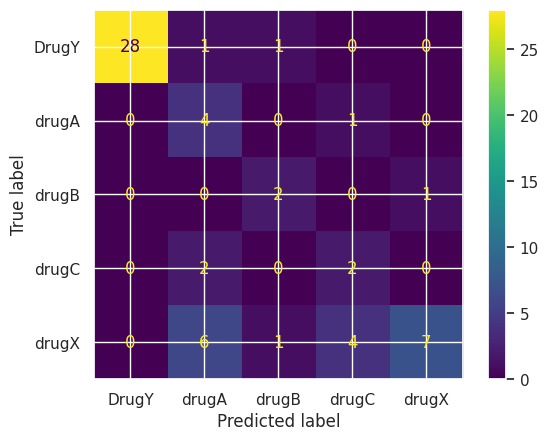

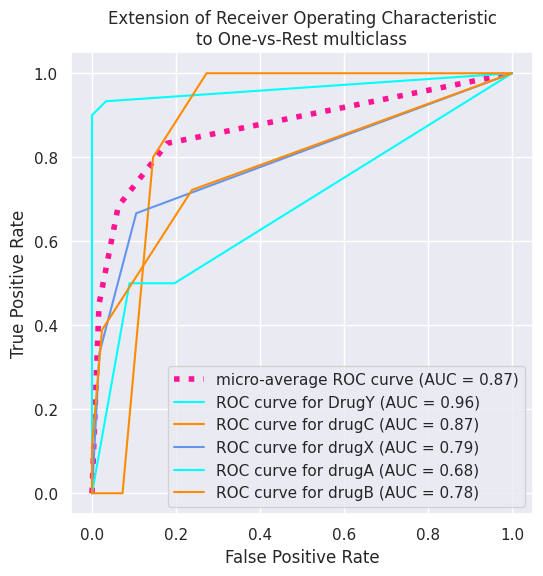

In [ ]:
model_prediction(KNeighborsClassifier(n_neighbors=3))

The accuracy of K-Neighbors model with 3 neighbors is is 71.67%. From the Score v.s. K value plot we see that model with 3 neighbors seams to perform the best. The performance drops when the number of neibors increases. However, compare the ROC curve and the AUC score of 3 neighbors and 10 neighbors model we find that the AUC score of the 10 neighbors model is higher, but, its accuracy is lower. Moreover, the AUC score of 3 neighbors shows that the prediction of drugX, A, and B amoung all drugs are less good; the AUC score of 10 neighbors shows that the prediction of drugA and B amoung all drugs are less good. It seans that the K-Neighbors model cannot predict the usage of drugA and drugB well.

*Support Vector Machine (SVM)*

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

The accuracy is: 100.00%


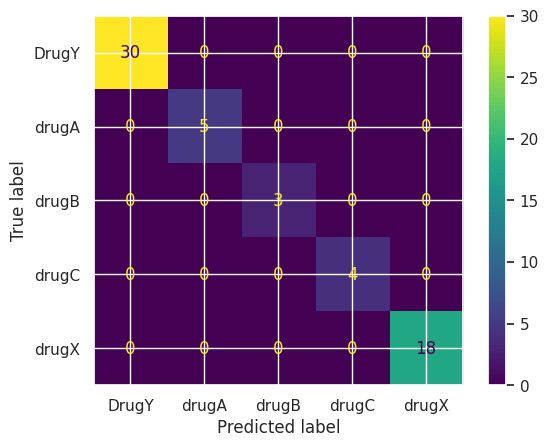

In [ ]:
model_prediction(SVC(kernel='linear', max_iter=300),False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       DrugY       1.00      0.23      0.38        30
       drugA       0.00      0.00      0.00         5
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         4
       drugX       0.00      0.00      0.00        18

    accuracy                           0.12        60
   macro avg       0.20      0.05      0.08        60
weighted avg       0.50      0.12      0.19        60

The accuracy is: 11.67%


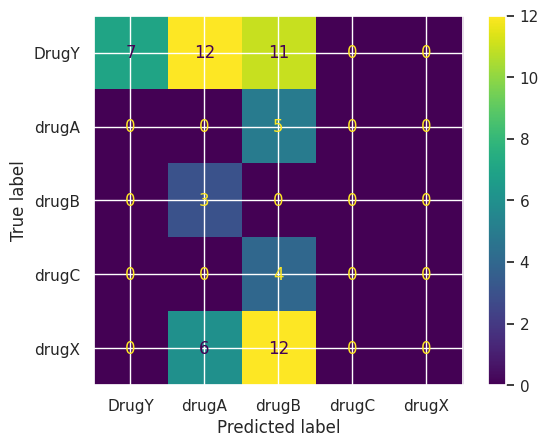

In [ ]:
model_prediction(SVC(kernel='sigmoid', max_iter=300),False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       DrugY       1.00      0.67      0.80        30
       drugA       0.18      0.80      0.30         5
       drugB       0.17      0.67      0.27         3
       drugC       0.00      0.00      0.00         4
       drugX       0.00      0.00      0.00        18

    accuracy                           0.43        60
   macro avg       0.27      0.43      0.27        60
weighted avg       0.52      0.43      0.44        60

The accuracy is: 43.33%


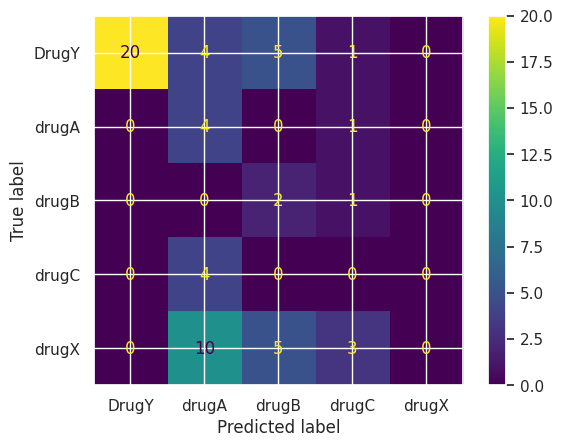

In [ ]:
model_prediction(SVC(kernel='rbf', max_iter=300),False)

              precision    recall  f1-score   support

       DrugY       1.00      0.67      0.80        30
       drugA       0.17      0.80      0.28         5
       drugB       0.27      1.00      0.43         3
       drugC       0.00      0.00      0.00         4
       drugX       1.00      0.06      0.11        18

    accuracy                           0.47        60
   macro avg       0.49      0.50      0.32        60
weighted avg       0.83      0.47      0.48        60

The accuracy is: 46.67%


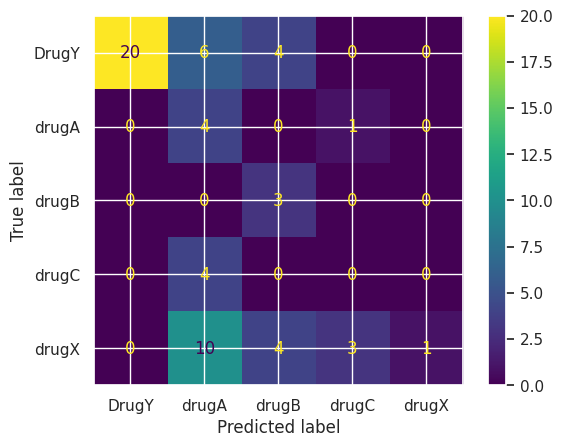

In [ ]:
model_prediction(SVC(kernel='poly', max_iter=300),False)

When the kernel is poly, rbf and sigmoid the SVM model perform terrible. Nevertheless, the linear SVM model reaches 100% accuracy. It looks like that linear SVM model pridicts perfictly, however, since the testing dataset contains only 60 data with only a little amount of drugA, drugC and drugB data, more testing data are require to make such conclusion.   

*Naive Bayes*

              precision    recall  f1-score   support

       DrugY       1.00      0.83      0.91        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       1.00      1.00      1.00        18

    accuracy                           0.92        60
   macro avg       0.83      0.97      0.88        60
weighted avg       0.94      0.92      0.92        60

The accuracy is: 91.67%


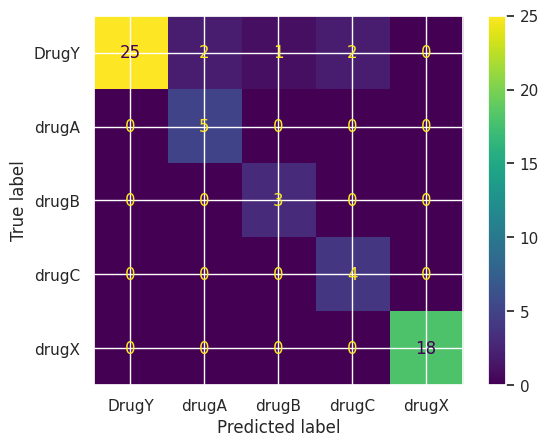

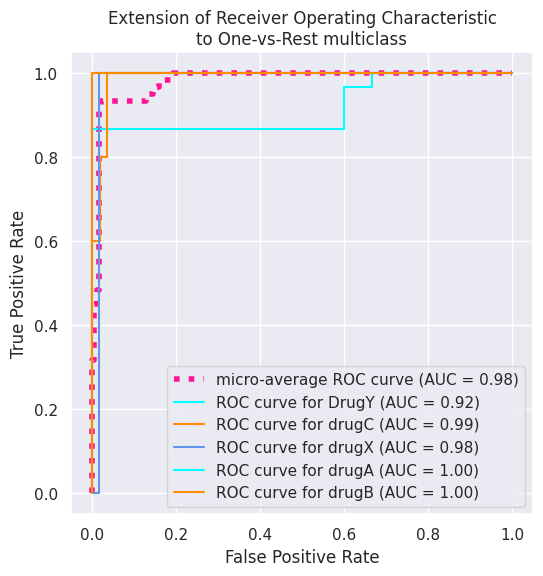

In [ ]:
model_prediction(GaussianNB())

              precision    recall  f1-score   support

       DrugY       1.00      0.63      0.78        30
       drugA       0.27      0.60      0.37         5
       drugB       0.25      0.33      0.29         3
       drugC       0.27      0.75      0.40         4
       drugX       0.80      0.67      0.73        18

    accuracy                           0.63        60
   macro avg       0.52      0.60      0.51        60
weighted avg       0.79      0.63      0.68        60

The accuracy is: 63.33%


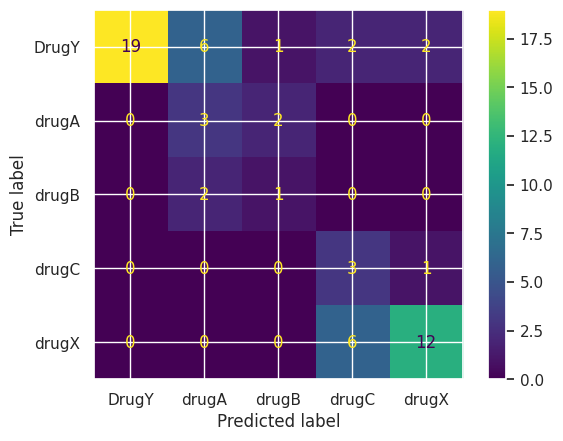

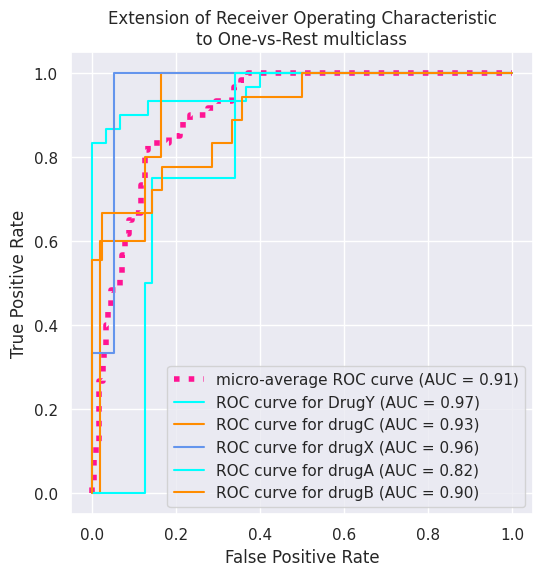

In [ ]:
model_prediction(CategoricalNB())

The performance of the Gaussian Naive Bayes model is better then the categorical Naive Bayes model. The previous reaches a 91.67% accuracy and high AUC score for all drug types. It is noticable that the AUC score for drugY, C and X is lower the other drugs in the Gaussian Naive Bayes model, which is completly reverse compare to other models.  

*Decision Tree*

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       0.36      1.00      0.53         4
       drugX       1.00      0.61      0.76        18

    accuracy                           0.88        60
   macro avg       0.87      0.92      0.86        60
weighted avg       0.96      0.88      0.90        60

The accuracy is: 88.33%


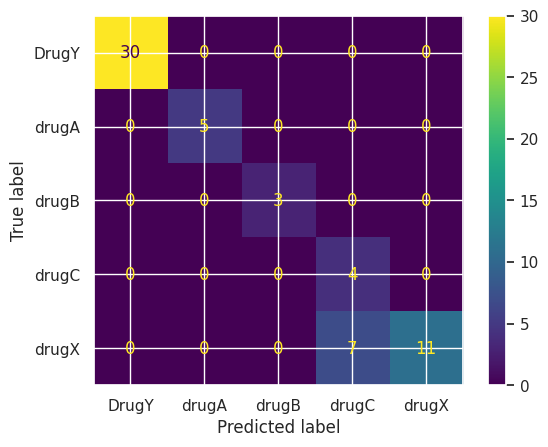

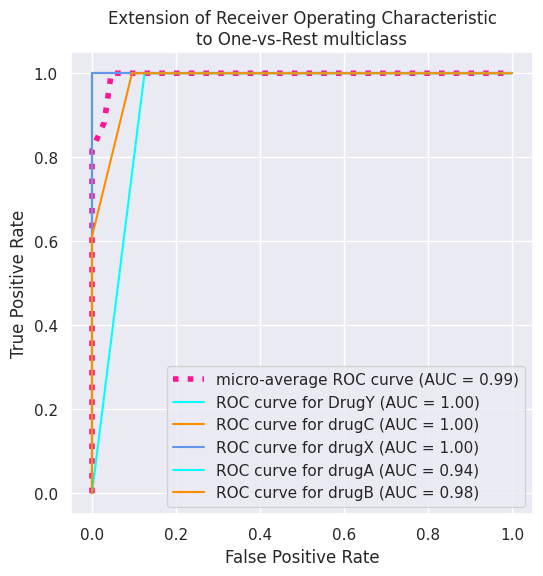

In [ ]:
model_prediction(DecisionTreeClassifier(max_leaf_nodes=5))

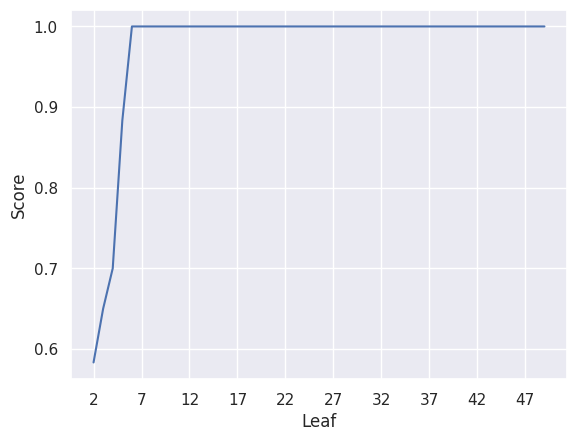

DT Acc Max 100.00%


In [ ]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

The accuracy of decision tree model can reach 100% when the number of leafs are more the 7. We can know that the model didn't make each data point a seperate leaf since the number of training data is 140, but we still cannot conclude the perfect performance of the model since the number of testing data is 30 which is close to the number of leafs.   

*Random Forest*

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

The accuracy is: 100.00%


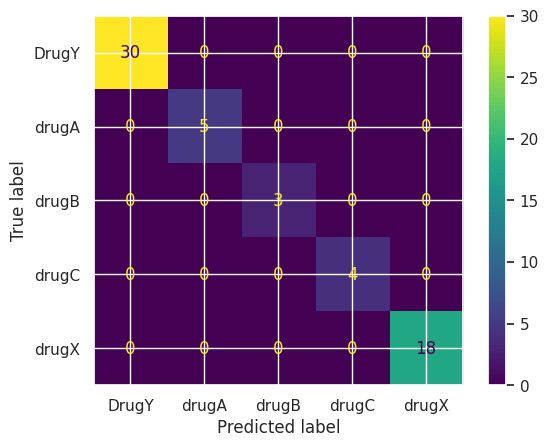

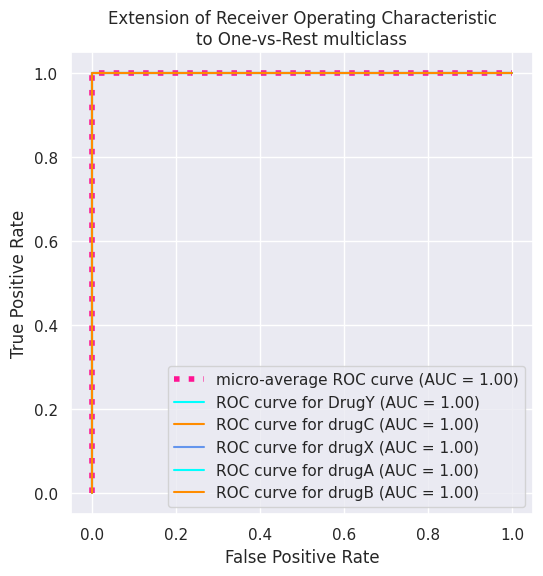

In [ ]:
model_prediction(RandomForestClassifier(max_leaf_nodes=5))

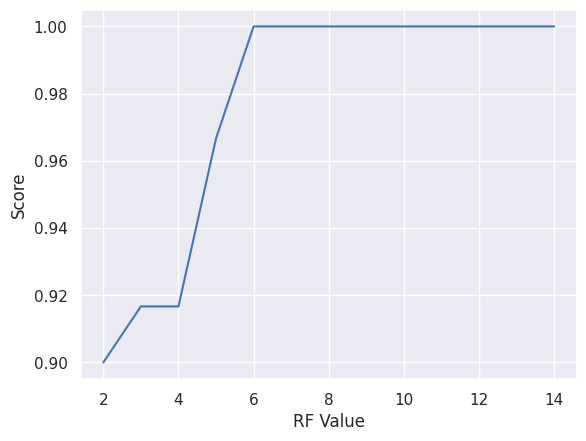

RF Acc Max 100.00%


In [ ]:
scoreListRF = []
for i in range(2,15):
    RFclassifier = RandomForestClassifier(max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,15), scoreListRF)
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

Similiar to decision tree, the random foresr model can also give perfect prediction when the max leaf nodes is greater then 6. However, the same problem of not enough testing data still exists.

*Linear Discriminant Analysis (LDA)*

              precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.36      1.00      0.53         4
       drugX       0.76      0.72      0.74        18

    accuracy                           0.77        60
   macro avg       0.72      0.88      0.76        60
weighted avg       0.85      0.77      0.78        60

The accuracy is: 76.67%


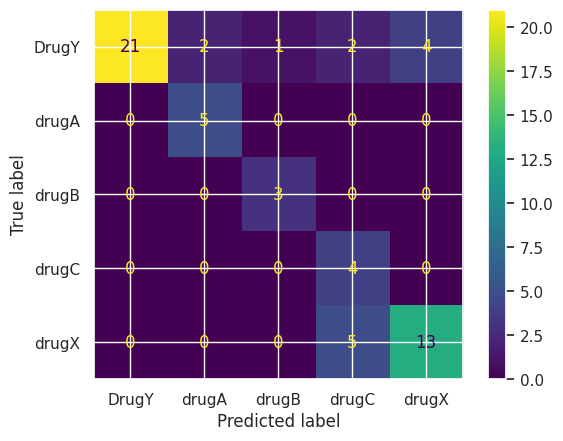

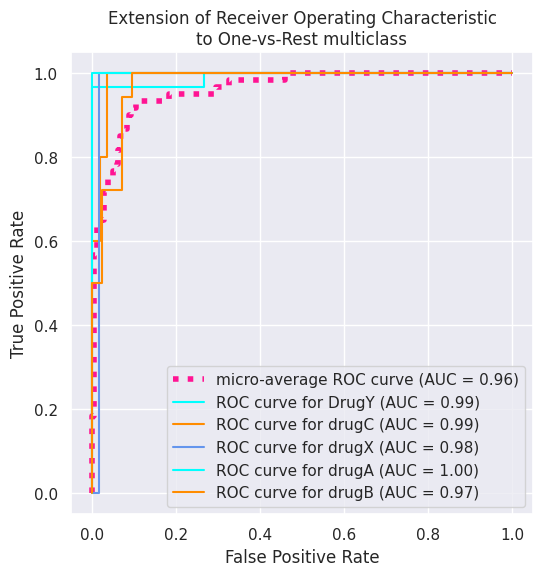

In [ ]:
model_prediction(LinearDiscriminantAnalysis())

The accuracy of LDA model is 76.67%. From the ROC curve and the AUC score we can see that the prediction of drugB amoung all drugs are not bad. The confusion matrix shows that drugX are easily to be predicted as drugC and drugY can be easily to miss classified as other drugs.

*Quadratic Discriminant Analysis (QDA)*

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:954: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm,

              precision    recall  f1-score   support

       DrugY       0.00      0.00      0.00        30
       drugA       0.00      0.00      0.00         5
       drugB       0.00      0.00      0.00         3
       drugC       0.07      1.00      0.12         4
       drugX       0.00      0.00      0.00        18

    accuracy                           0.07        60
   macro avg       0.01      0.20      0.03        60
weighted avg       0.00      0.07      0.01        60

The accuracy is: 6.67%


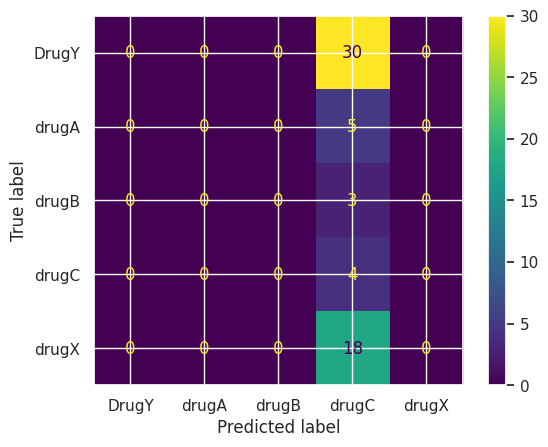

In [ ]:
model_prediction(QuadraticDiscriminantAnalysis(),False)

QDA performs terrible. It predicts everything to drugC.

**Conclusion**

From the result we find that

*   The original data is imbalance with 45.5% of data are result in drugA, therefore we  can say that any model with accuracy less then 45.5% is useless.

*   Compare the accuracy: SVM (100%) = Random forest (100%) = Decision tree (100%) = Naive Bayes (92%) >Logistic regression (80%) > LDA (77%) >  K-Neighbors (72%) > QDA (7%)

*   There are only 5 drugA, 4 drugC and 3 drugB data in the testing dataset. A larger testing data should be considered for a better model design.

*   The SVM and Decision tree seams to perform the best and need less calculation.

*   In most model, the AUC score of drugA and drugB are the smallest, however,  the situation is complete reverse in the Gaussian Naive Bayes model. A possible clasification strategy is to first predict the usage of the drug using some other model and then double check if the usage of of drugA and drugB is correct using the Gaussian Naive Bayes model.  